# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
print('Shape:',diamonds.shape)
diamonds.sample(4)

Shape: (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
48077,0.56,Ideal,E,VS1,61.3,55.0,1930,5.29,5.32,3.25
31039,0.34,Ideal,D,VS1,62.6,56.0,749,4.49,4.52,2.82
21689,1.24,Ideal,G,VVS2,61.2,56.0,9788,6.92,6.88,4.22
776,0.70,Premium,D,VS2,59.6,61.0,2859,5.80,5.77,3.45


In [4]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [5]:
(18823 - 326)/4 + 326

4950.25

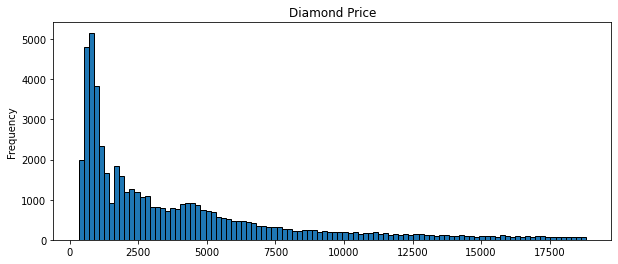

In [6]:
diamonds.price.plot(kind='hist', bins = 100, figsize = (10,4), edgecolor='black', title='Diamond Price');
plt.show()
# diamonds.price.plot(kind='hist', bins = 100, figsize = (10,4), logx = True, logy=True, edgecolor='black', title='Log Price');

## Fixed width binning
You can cut the data into a number of fixed bins using `pd.qcut`.  You can specify your own cut-offs for the bins as a list.    
Note the interval notation.  `(` means not-inclusive, and `]` means inclusive.  

For example:  
Assuming integers:  
```
(0, 3) = 1, 2
(0, 3] = 1, 2, 3, 4, 5
[0, 3) = 0, 1, 2
[0, 3] = 0, 1, 2, 3
```

In [7]:
pd.cut(diamonds.price, bins = 5)

0        (307.503, 4025.4]
1        (307.503, 4025.4]
2        (307.503, 4025.4]
3        (307.503, 4025.4]
4        (307.503, 4025.4]
               ...        
53935    (307.503, 4025.4]
53936    (307.503, 4025.4]
53937    (307.503, 4025.4]
53938    (307.503, 4025.4]
53939    (307.503, 4025.4]
Name: price, Length: 53940, dtype: category
Categories (5, interval[float64, right]): [(307.503, 4025.4] < (4025.4, 7724.8] < (7724.8, 11424.2] < (11424.2, 15123.6] < (15123.6, 18823.0]]

In [8]:
pd.cut(diamonds.price, bins = [0, 2500, 100000])

0             (0, 2500]
1             (0, 2500]
2             (0, 2500]
3             (0, 2500]
4             (0, 2500]
              ...      
53935    (2500, 100000]
53936    (2500, 100000]
53937    (2500, 100000]
53938    (2500, 100000]
53939    (2500, 100000]
Name: price, Length: 53940, dtype: category
Categories (2, interval[int64, right]): [(0, 2500] < (2500, 100000]]

In [9]:
diamonds['pricebin'] = pd.cut(diamonds.price, bins = [0, 2500, 100000])
diamonds[['price', 'pricebin']].sample(6)

,price,pricebin
24354,12617,"(2500, 100000]"
11267,4971,"(2500, 100000]"
53067,2608,"(2500, 100000]"
6129,3984,"(2500, 100000]"
30492,732,"(0, 2500]"
18326,7455,"(2500, 100000]"


In [10]:
diamonds.pricebin.value_counts()

(0, 2500]         27542
(2500, 100000]    26398
Name: pricebin, dtype: int64

## Quantile binning

In [11]:
# You can provide label instead of using the default interval notation, and you can 
# cut by quartiles using `qcut`

diamonds['pricequantiles'] = pd.qcut(diamonds.price, 4, labels=['First', 'Second', 'Third', 'Fourth'])
diamonds[['price', 'pricequantiles']].sample(6)

,price,pricequantiles
28252,666,First
40683,1155,Second
20002,8541,Fourth
28064,660,First
277,2795,Third
14579,5885,Fourth


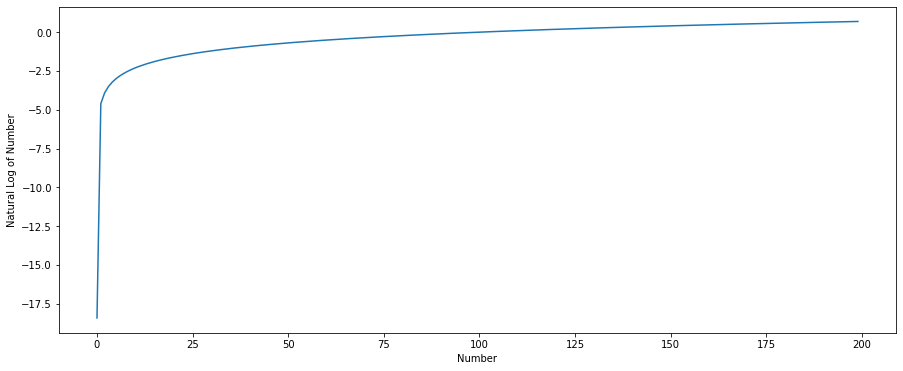

In [12]:
# graph of the log function
plt.ylabel('Natural Log of Number')
plt.xlabel('Number')
pd.Series(np.log(np.arange(0,2, .01)+1e-8)).plot.line(figsize = (15,6));

## Log transformation

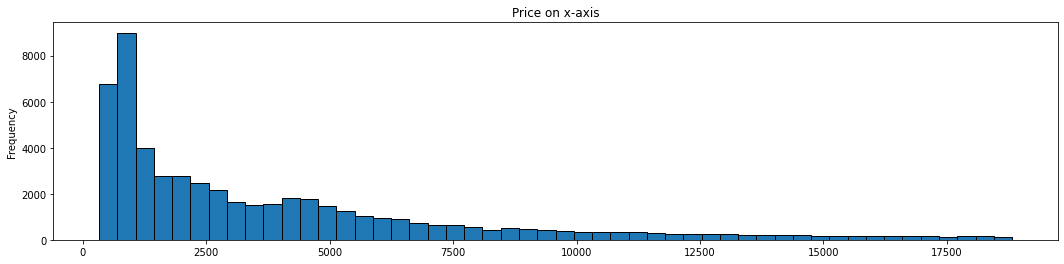

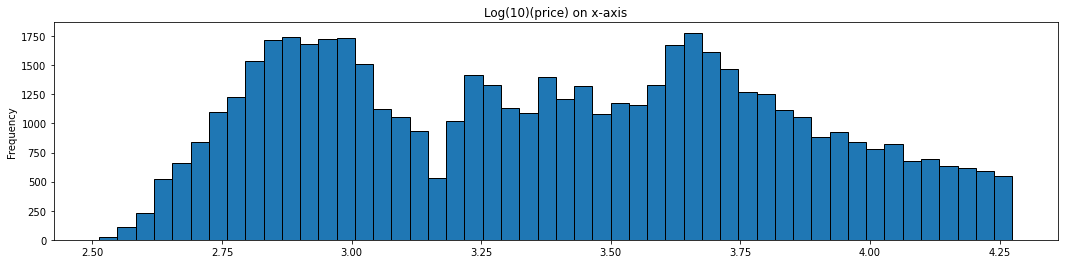

In [13]:
diamonds.price.plot(kind='hist', bins = 50, figsize = (18,4), \
                    edgecolor='black', title='Price on x-axis');
plt.show()
diamonds['log_transform'] = np.log10(diamonds.price)
diamonds['log_transform'].plot(kind='hist', bins = 50, figsize = (18,4), \
                              edgecolor='black', title='Log(10)(price) on x-axis');

## Box Cox Transform

In [14]:
from scipy.stats import boxcox

In [15]:
bc_data, bc_lambda = boxcox(diamonds.price)
print('Lambda is:', bc_lambda)

diamonds['boxcox_transform'] = bc_data


Lambda is: -0.06699030544539092


Lambda for Box-Cox is: -0.06699030544539092


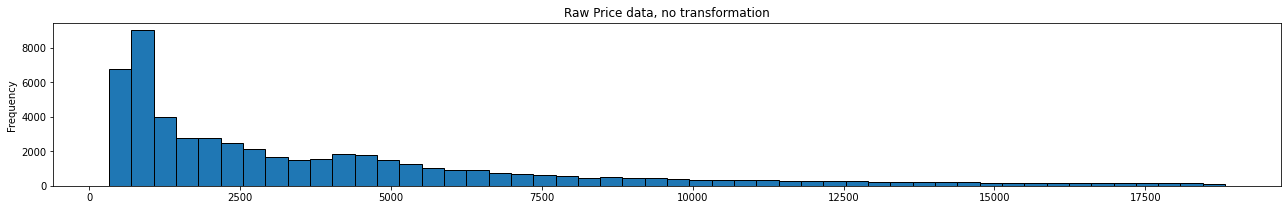

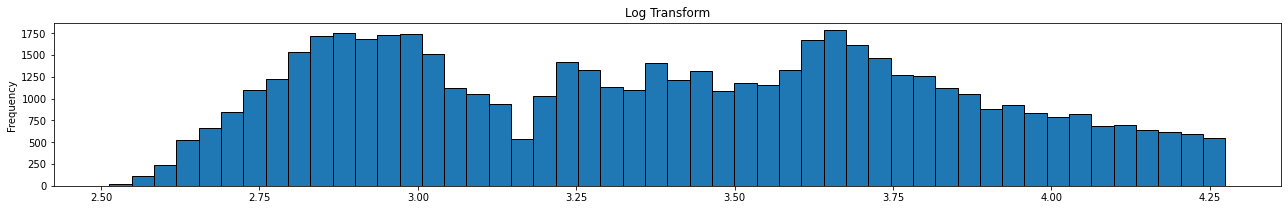

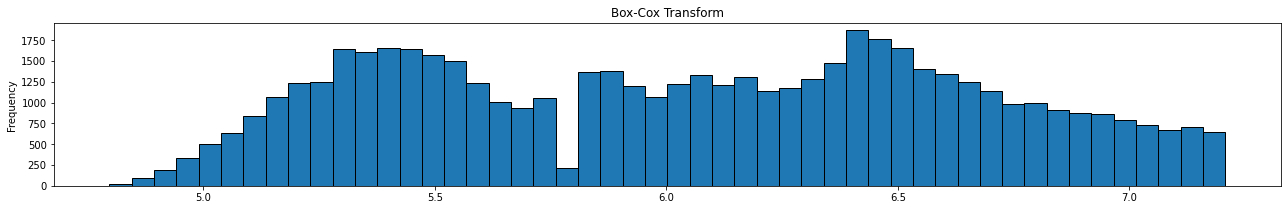

In [16]:
print('Lambda for Box-Cox is:', bc_lambda)
diamonds.price.plot(kind='hist', bins = 50, figsize = (22,3), edgecolor='black', title='Raw Price data, no transformation');
plt.show()
diamonds['log_transform'].plot(kind='hist', bins = 50, figsize = (22,3), edgecolor='black', title='Log Transform');
plt.show()
diamonds['boxcox_transform'].plot(kind='hist', bins = 50, figsize = (22,3), edgecolor='black', title='Box-Cox Transform');


### Minmax, standardization and normalization

#### Minmax and standardization of feature columns

In [17]:
import sklearn.preprocessing as preproc
diamonds['minmax'] = preproc.minmax_scale(diamonds[['price']])
diamonds['standardized'] = preproc.StandardScaler().fit_transform(diamonds[['price']]) # At the column level

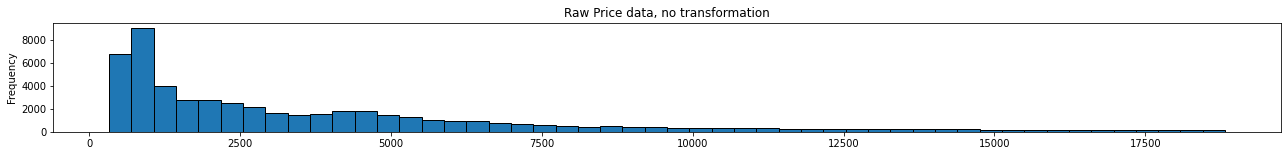

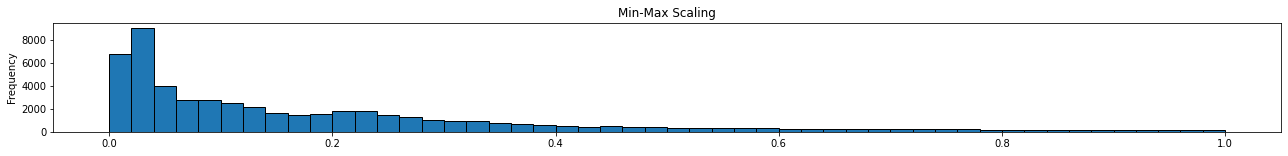

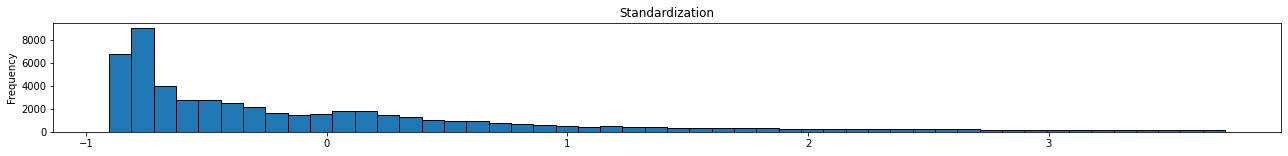

In [18]:
diamonds.price.plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='Raw Price data, no transformation');
plt.show()
diamonds['minmax'].plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='Min-Max Scaling');
plt.show()
diamonds['standardized'].plot(kind='hist', bins = 50, figsize = (22,2), edgecolor='black', title='Standardization');
plt.show()


#### Standardization of a single data series, or vector can be done using the function zscore  
#### This may be necessary as `StandardScaler` expects an m x n array as input (to standardize an entire feature set, as opposed to a single column)

In [19]:
from scipy.stats import zscore
zscore(diamonds.price)

array([-0.90409516, -0.90409516, -0.9038445 , ..., -0.29473076,
       -0.29473076, -0.29473076])

#### Use normalization where observations vary a lot between themselves

In [20]:
# Data source: https://data.worldbank.org/?locations=AU-CN-CH-IN-VN

df = pd.DataFrame({'NI-USDTrillion': {'Australia': 1034.18,
  'China': 10198.9,
  'India': 2322.05,
  'Switzerland': 519.097,
  'Vietnam': 176.367},
 'AgriLand-sqkm-mm': {'Australia': 3.71837,
  'China': 5.285311,
  'India': 1.79674,
  'Switzerland': 0.01512999,
  'Vietnam': 0.121688},
 'Freight-mm-ton-km': {'Australia': 1982.586171,
  'China': 23323.6147,
  'India': 2407.098107,
  'Switzerland': 1581.35236,
  'Vietnam': 453.34954},
 'AirPassengers(m)': {'Australia': 74.257326,
  'China': 551.234509,
  'India': 139.752424,
  'Switzerland': 26.73257,
  'Vietnam': 42.592762},
 'ArableLandPct': {'Australia': 3.997909522,
  'China': 12.67850328,
  'India': 52.6088141,
  'Switzerland': 10.07651831,
  'Vietnam': 22.53781404},
 'ArableLandHect': {'Australia': 30.752,
  'China': 119.4911,
  'India': 156.416,
  'Switzerland': 0.398184,
  'Vietnam': 6.9883},
 'ArmedForces': {'Australia': 58000.0,
  'China': 2695000.0,
  'India': 3031000.0,
  'Switzerland': 21000.0,
  'Vietnam': 522000.0}})

In [21]:
df

,NI-USDTrillion,AgriLand-sqkm-mm,Freight-mm-ton-km,AirPassengers(m),ArableLandPct,ArableLandHect,ArmedForces
Australia,1034.180,3.718370,1982.586171,74.257326,3.997910,30.752000,58000.0
China,10198.900,5.285311,23323.614700,551.234509,12.678503,119.491100,2695000.0
India,2322.050,1.796740,2407.098107,139.752424,52.608814,156.416000,3031000.0
Switzerland,519.097,0.015130,1581.352360,26.732570,10.076518,0.398184,21000.0
Vietnam,176.367,0.121688,453.349540,42.592762,22.537814,6.988300,522000.0


In [22]:
import sklearn.preprocessing as preproc
df2 = pd.DataFrame(preproc.normalize(df), columns = df.columns, index= df.index) # At the row level
df2

,NI-USDTrillion,AgriLand-sqkm-mm,Freight-mm-ton-km,AirPassengers(m),ArableLandPct,ArableLandHect,ArmedForces
Australia,0.017817,6.406217e-05,0.034157,0.001279,0.000069,0.000530,0.999257
China,0.003784,1.961067e-06,0.008654,0.000205,0.000005,0.000044,0.999955
India,0.000766,5.927875e-07,0.000794,0.000046,0.000017,0.000052,0.999999
Switzerland,0.024642,7.182228e-07,0.075067,0.001269,0.000478,0.000019,0.996873
Vietnam,0.000338,2.331187e-07,0.000868,0.000082,0.000043,0.000013,1.000000


In [23]:
(df2**2).sum(axis=1)

Australia      1.0
China          1.0
India          1.0
Switzerland    1.0
Vietnam        1.0
dtype: float64

## Inversing a transform

In [24]:
diamonds = sns.load_dataset('diamonds')
print('Original diamond prices (first 4 only)')
print(diamonds['price'][:4])
scaler = preproc.StandardScaler()
diamonds['standardized'] = scaler.fit_transform(diamonds[['price']])
print('\n\nStandardized prices')
print(diamonds['standardized'][:4])
print('\n\nReconstructed prices by un-scaling the standardized prices:')
print(scaler.inverse_transform(diamonds['standardized'][:4].values.reshape(-1, 1)))

Original diamond prices (first 4 only)
0    326
1    326
2    327
3    334
Name: price, dtype: int64


Standardized prices
0   -0.904095
1   -0.904095
2   -0.903844
3   -0.902090
Name: standardized, dtype: float64


Reconstructed prices by un-scaling the standardized prices:
[[326.]
 [326.]
 [327.]
 [334.]]


## One hot

In [25]:
df = pd.DataFrame({'fruit': 
                   ['apple', 'banana', 'pear', 
                    'pear', 'apple', 'apple'],
                  'weight_gm':[120,100,104,60,98,119],
                  'price':[0.25, 0.18, 0.87, 0.09, 1.02,.63]})
df

,fruit,weight_gm,price
0,apple,120,0.25
1,banana,100,0.18
2,pear,104,0.87
3,pear,60,0.09
4,apple,98,1.02
5,apple,119,0.63


In [26]:
pd.get_dummies(df)

,weight_gm,price,fruit_apple,fruit_banana,fruit_pear
0,120,0.25,1,0,0
1,100,0.18,0,1,0
2,104,0.87,0,0,1
3,60,0.09,0,0,1
4,98,1.02,1,0,0
5,119,0.63,1,0,0


In [27]:
pd.get_dummies(df, drop_first=True)

,weight_gm,price,fruit_banana,fruit_pear
0,120,0.25,0,0
1,100,0.18,1,0
2,104,0.87,0,1
3,60,0.09,0,1
4,98,1.02,0,0
5,119,0.63,0,0


#### Label encoding

In [28]:
df

,fruit,weight_gm,price
0,apple,120,0.25
1,banana,100,0.18
2,pear,104,0.87
3,pear,60,0.09
4,apple,98,1.02
5,apple,119,0.63


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(df['fruit'].values.ravel()) # This needs a 1D array
df['encoded_labels'] = encoded_labels
df

,fruit,weight_gm,price,encoded_labels
0,apple,120,0.25,0
1,banana,100,0.18,1
2,pear,104,0.87,2
3,pear,60,0.09,2
4,apple,98,1.02,0
5,apple,119,0.63,0


In [30]:
# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'apple', 1: 'banana', 2: 'pear'}

In [31]:
from tensorflow.keras.utils import to_categorical
to_categorical(encoded_labels)

2021-10-15 21:11:31.279806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2021-10-15 21:11:31.279870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Imbalanced classes

In [32]:
df = sns.load_dataset('geyser')

In [33]:
df

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [34]:
df.kind.value_counts()

long     172
short    100
Name: kind, dtype: int64

In [35]:
# Split the dataframe between X and y
X = df[['duration', 'waiting']]
y = df[['kind']]

In [36]:
y.value_counts()

kind 
long     172
short    100
dtype: int64

#### Random Under Sampler

In [37]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_res, y_res = undersampler.fit_resample(X, y)

In [38]:
y_res.value_counts()

kind 
long     100
short    100
dtype: int64

#### Centroid Based Under Sampler

In [39]:
from imblearn.under_sampling import ClusterCentroids
clustercentroids = ClusterCentroids()
X_res, y_res = clustercentroids.fit_resample(X, y)

In [40]:
y_res.value_counts()

kind 
long     100
short    100
dtype: int64

#### Random Over Sampler

In [41]:
from imblearn.over_sampling import RandomOverSampler
randomoversampler = RandomOverSampler()
X_res, y_res = randomoversampler.fit_resample(X, y)

In [42]:
y_res.value_counts()

kind 
long     172
short    172
dtype: int64

#### SMOTE Over Sampler

In [43]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [44]:
y_res.value_counts()

kind 
long     172
short    172
dtype: int64

### PCA in Action

In [45]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset('mtcars').data
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [46]:
# Separate out the features (assuming mpg is the target variable)
feat = df.iloc[:,1:]

# Next, standard scale the feature set
import sklearn.preprocessing as preproc
feat = pd.DataFrame(data=preproc.StandardScaler().fit_transform(feat), columns=feat.columns, index = feat.index)
print(feat.shape)
feat.head()

(32, 10)


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
Mazda RX4 Wag,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
Datsun 710,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
Hornet 4 Drive,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
Hornet Sportabout,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


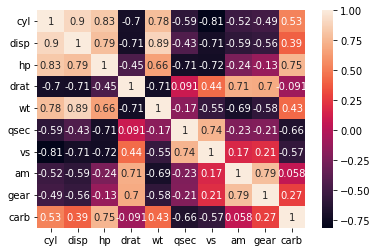

In [47]:
# Check out the correlation
sns.heatmap(feat.corr(), annot=True);

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.8) #0.8 means keep 80% of the variance

In [49]:
# Get the new features and hold them in variable new
pc_mtcars = pca.fit_transform(feat)

In [50]:
pc_mtcars.shape

(32, 2)

In [51]:
pc_mtcars = pd.DataFrame(pc_mtcars)
pc_mtcars

,0,1
0,0.632134,1.739877
1,0.605027,1.554343
2,2.801549,-0.122632
3,0.259204,-2.364265
4,-2.032508,-0.774822
5,0.204867,-2.778790
6,-2.846324,0.318210
7,1.938647,-1.454239
8,2.300271,-1.963602
9,0.636986,-0.150858


In [52]:
# proportion variance explained by each of the principal components
pca.explained_variance_ratio_

array([0.57602174, 0.26496432])

In [53]:
# proportion variance explained by both
(pca.explained_variance_ratio_).cumsum()[-1]

0.8409860622774871

In [54]:
# Absolute variance explained
pca.explained_variance_

array([5.9460309 , 2.73511555])

In [55]:
# Check if the principal components are orthogonal (dot product should be zero)
np.dot(pc_mtcars[0], pc_mtcars[1])

9.769962616701378e-15

In [56]:
pc_mtcars.head()

,0,1
0,0.632134,1.739877
1,0.605027,1.554343
2,2.801549,-0.122632
3,0.259204,-2.364265
4,-2.032508,-0.774822


<AxesSubplot:xlabel='0', ylabel='1'>

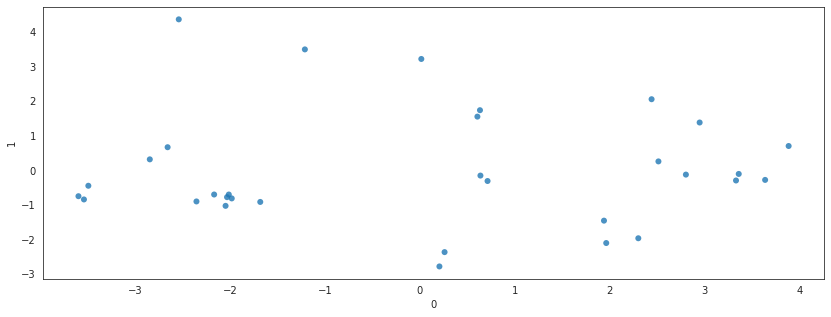

In [57]:
# Scatterplot of first two principal components
sns.set_style(style='white')
plt.figure(figsize = (14,5))
sns.scatterplot(data = pc_mtcars, x = 0, y = 1, alpha = .8, edgecolor = 'None')

##### Check if eigenvectors multiplied by original feature set 
##### data equals the principal components (Optional)

In [58]:
# Eigenvectors.  These are multiplied by the actual features and summed up to get the new features
ev = pca.components_
ev

array([[-0.40297112, -0.39592428, -0.35432552,  0.3155948 , -0.36680043,
         0.21989818,  0.33335709,  0.24749911,  0.22143747, -0.22670801],
       [ 0.03901479, -0.05393117,  0.24496137,  0.27847781, -0.14675805,
        -0.46066271, -0.22751987,  0.43201042,  0.46516217,  0.411693  ]])

In [59]:
# For the first observation, these are the new feature values
pc_mtcars.iloc[0:2]


,0,1
0,0.632134,1.739877
1,0.605027,1.554343


In [60]:
feat.iloc[0]

cyl    -0.106668
disp   -0.579750
hp     -0.543655
drat    0.576594
wt     -0.620167
qsec   -0.789601
vs     -0.881917
am      1.208941
gear    0.430331
carb    0.746967
Name: Mazda RX4, dtype: float64

In [61]:
(ev[0] * feat.iloc[0])

cyl     0.042984
disp    0.229537
hp      0.192631
drat    0.181970
wt      0.227477
qsec   -0.173632
vs     -0.293993
am      0.299212
gear    0.095292
carb   -0.169343
Name: Mazda RX4, dtype: float64

In [62]:
(ev[0] * feat.iloc[0]).sum()

0.6321344928989644

In [63]:
(ev[0] * feat).sum(axis=1)

Mazda RX4              0.632134
Mazda RX4 Wag          0.605027
Datsun 710             2.801549
Hornet 4 Drive         0.259204
Hornet Sportabout     -2.032508
Valiant                0.204867
Duster 360            -2.846324
Merc 240D              1.938647
Merc 230               2.300271
Merc 280               0.636986
Merc 280C              0.712003
Merc 450SE            -2.168500
Merc 450SL            -2.013998
Merc 450SLC           -1.983030
Cadillac Fleetwood    -3.540037
Lincoln Continental   -3.597893
Chrysler Imperial     -3.493731
Fiat 128               3.329571
Honda Civic            3.883988
Toyota Corolla         3.636227
Toyota Corona          1.962264
Dodge Challenger      -2.048033
AMC Javelin           -1.682576
Camaro Z28            -2.658623
Pontiac Firebird      -2.354816
Fiat X1-9              3.358263
Porsche 914-2          2.440051
Lotus Europa           2.946328
Ford Pantera L        -1.212566
Ferrari Dino           0.014182
Maserati Bora         -2.541137
Volvo 14

In [64]:
(ev[1] * feat).sum(axis=1)

Mazda RX4              1.739877
Mazda RX4 Wag          1.554343
Datsun 710            -0.122632
Hornet 4 Drive        -2.364265
Hornet Sportabout     -0.774822
Valiant               -2.778790
Duster 360             0.318210
Merc 240D             -1.454239
Merc 230              -1.963602
Merc 280              -0.150858
Merc 280C             -0.308009
Merc 450SE            -0.698349
Merc 450SL            -0.698920
Merc 450SLC           -0.811307
Cadillac Fleetwood    -0.841191
Lincoln Continental   -0.747153
Chrysler Imperial     -0.445347
Fiat 128              -0.292943
Honda Civic            0.704290
Toyota Corolla        -0.276133
Toyota Corona         -2.101797
Dodge Challenger      -1.026281
AMC Javelin           -0.913388
Camaro Z28             0.669277
Pontiac Firebird      -0.899123
Fiat X1-9             -0.103399
Porsche 914-2          2.057439
Lotus Europa           1.383718
Ford Pantera L         3.498277
Ferrari Dino           3.221361
Maserati Bora          4.366990
Volvo 14